In [1]:
import numpy as np
from numpy.random import RandomState
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

from Tree import Tree
from Losses import MSE
from dataset_transform import get_first_entries, OptEntry

### Simplest regression for the tree, to check, that it works somehow.

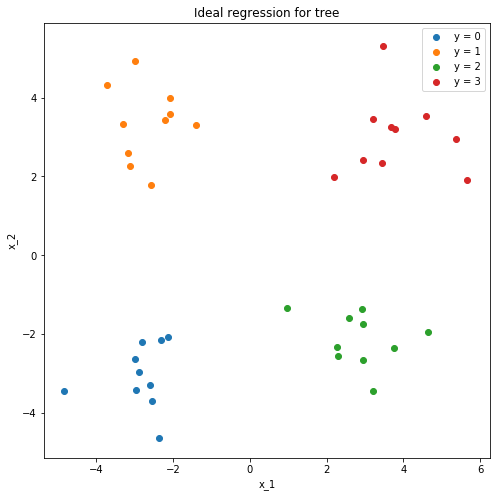

In [2]:
y = 0
size = 10
rs = RandomState(117)

a=3

X_train = np.empty((0, 2))
y_train = np.empty(0)

plt.figure(figsize=(8, 8))
plt.title('Ideal regression for tree')
plt.xlabel('x_1')
plt.ylabel('x_2')

for mean_x in [-a, a]:
    for mean_y in [-a, a]:
        mean = (mean_x, mean_y)
        cov = np.eye(2)
        X_new = rs.multivariate_normal(mean, cov, size=size)
        plt.scatter(X_new[:, 0], X_new[:, 1], label='y = {}'.format(y))
        X_train = np.vstack([X_train, X_new])
        y_train = np.hstack([y_train, np.ones(size) * y])
        y += 1
plt.legend()

Let's see what error our tree got on this dataset, should be close to 0

In [3]:
mse = MSE(len(y_train))
entries, tresholds = get_first_entries(X_train, y_train, 4, mse, y_train.mean())
tree = Tree(3, mse, entries, tresholds, 0, 3, 0.01)
tree.construct()

loss = 0
for entry in entries:
    loss += (entry.y - (tree.predict(entry) + entry.prediction)) ** 2
print "MSE is {}".format(loss / len(entries))

MSE is 1.23259516441e-32


### Comparison with sklear decision tree regression

In [4]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [5]:
entries, tresholds = get_first_entries(X, y, 6, mse, y.mean())
tree = Tree(5, mse, entries, tresholds, 0.01, 3, 0.01)
tree.construct()

test_predictions = []
for x in X_test:
    x = x[0]
    for i in range(len(tresholds[0]) - 1):
        if x < tresholds[0][0]:
            bin_num = 0
        if x > tresholds[0][-1]:
            bin_num = len(tresholds[0]) - 1
        if x > tresholds[0][i] and x <= tresholds[0][i + 1]:
            bin_num = i
    entry = OptEntry([bin_num], np.sin(x), 0, 0, entries[0].prediction)
    test_predictions.append(tree.predict(entry) + entry.prediction)

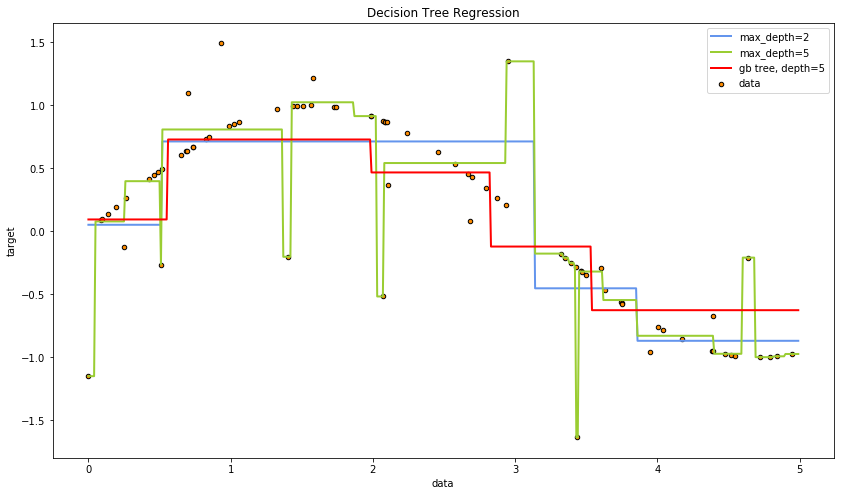

In [6]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, test_predictions, color="red", label="gb tree, depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()